In [1]:
import torch
# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

if cuda_available:
    # Get the number of GPUs available
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")

    # Get the name of each GPU
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")

    # Get the current GPU memory usage
    for i in range(num_gpus):
        gpu_memory_allocated = torch.cuda.memory_allocated(i)
        gpu_memory_reserved = torch.cuda.memory_reserved(i)
        print(f"GPU {i} memory allocated: {gpu_memory_allocated / (1024 ** 3):.2f} GB")
        print(f"GPU {i} memory reserved: {gpu_memory_reserved / (1024 ** 3):.2f} GB")
else:
    print("CUDA is not available.")

CUDA available: True
Number of GPUs available: 2
GPU 0: NVIDIA GeForce RTX 2070
GPU 1: NVIDIA GeForce RTX 2070
GPU 0 memory allocated: 0.00 GB
GPU 0 memory reserved: 0.00 GB
GPU 1 memory allocated: 0.00 GB
GPU 1 memory reserved: 0.00 GB


In [2]:
import sys
import os
import pickle
import logging
import numba
import matplotlib
import matplotlib.pyplot as plt
logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

# Add the src directory to sys.path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.IndependentSteps import Pycromanager2H5, FFF2H5, SingleTIFF2H5

from src.SequentialSteps import BIGFISH_SpotDetection, SimpleCellposeSegmentaion, IlluminationCorrection, \
                                Calculate_BIGFISH_Threshold, CellProperties, Automatic_BIGFISH_Threshold, GeneralCellposeSegmentation

from src.FinalizationSteps import Save_Outputs, Save_Images, Save_Parameters, Save_Masks, return_to_NAS, remove_local_data_but_keep_h5, \
                                     remove_local_data

from src.Parameters import Parameters, Experiment, Settings, ScopeClass, DataContainer

from src.Displays import Display

from src.GUI import GUI, StepGUI

from src.Pipeline import Pipeline

c:\Users\formanj\GitHub\AngelFISH


INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7


In [3]:
scope = ScopeClass() 
data = DataContainer(clear_after_error=False)
settings = Settings(name='demo')
experiment = Experiment()

In [4]:
# you can change the parameters
experiment.initial_data_location = r'Users/Jack/HistoneModification_ScratchAssay/Full 24 hour scratch assay.tif'

experiment.nucChannel = 0
experiment.cytoChannel = 0
experiment.voxel_size_z = 500

settings.num_chunks_to_run = 1 # this is the limit to how many chunks you want to run and it will stop after that
settings.sigma_dict = {0: 50, 1: 100, 2: 100}
settings.mask_structure = {'cellMasks': ('ptczyx', None, None),
                          'nucMasks': ('ptczyx', None, None),
                            'cell_mask': ('zyx', 'cytoChannel', 'cellMasks'), 
                            'nuc_mask': ('zyx', 'nucChannel', 'nucMasks')}

Parameters().get_parameters()

{'state': 'global',
 'instances': [],
 'voxel_size_yx': 130,
 'spot_z': 500,
 'spot_yx': 360,
 'init': True,
 'local_dataset_location': None,
 'h5_file': None,
 'total_num_chunks': None,
 'images': None,
 'masks': None,
 'temp': None,
 'clear_after_error': False,
 'name': 'demo',
 'return_data_to_NAS': True,
 'NUMBER_OF_CORES': 4,
 'save_files': True,
 'num_chunks_to_run': 1,
 'connection_config_location': 'c:\\Users\\formanj\\GitHub\\AngelFISH\\config_nas.yml',
 'display_plots': True,
 'load_in_mask': False,
 'mask_structure': {'cellMasks': ('ptczyx', None, None),
  'nucMasks': ('ptczyx', None, None),
  'cell_mask': ('zyx', 'cytoChannel', 'cellMasks'),
  'nuc_mask': ('zyx', 'nucChannel', 'nucMasks')},
 'order': 'pt',
 'share_name': 'share',
 'sigma_dict': {0: 50, 1: 100, 2: 100},
 'initial_data_location': 'Users/Jack/HistoneModification_ScratchAssay/Full 24 hour scratch assay.tif',
 'index_dict': None,
 'nucChannel': 0,
 'cytoChannel': 0,
 'FISHChannel': None,
 'voxel_size_z': 500,
 '

In [5]:
SingleTIFF2H5().run()

Overwriting local_dataset_location in DataContainer
Overwriting h5_file in DataContainer
Overwriting total_num_chunks in DataContainer
Overwriting independent_params in Experiment
Overwriting initial_data_location in Experiment


{'local_dataset_location': ['c:\\Users\\formanj\\GitHub\\AngelFISH\\dataBases\\Full 24 hour scratch assay.h5'],
 'h5_file': [<HDF5 file "Full 24 hour scratch assay.h5" (mode r)>],
 'total_num_chunks': 35,
 'images': dask.array<array, shape=(1, 35, 1, 1, 5632, 12084), dtype=uint8, chunksize=(1, 1, 1, 1, 5632, 12084), chunktype=numpy.ndarray>,
 'independent_params': {0: {'NAS_location': 'Users/Jack/HistoneModification_ScratchAssay/Full 24 hour scratch assay.tif\\Full 24 hour scratch assay.h5'}},
 'position_indexs': array([1]),
 'initial_data_location': ['Users/Jack/HistoneModification_ScratchAssay'],
 'cellMasks': dask.array<zeros_like, shape=(1, 35, 1, 1, 5632, 12084), dtype=float64, chunksize=(1, 35, 1, 1, 692, 692), chunktype=numpy.ndarray>,
 'nucMasks': dask.array<zeros_like, shape=(1, 35, 1, 1, 5632, 12084), dtype=float64, chunksize=(1, 35, 1, 1, 692, 692), chunktype=numpy.ndarray>}

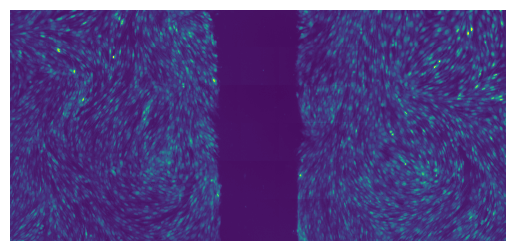

array([[21, 15, 18, ...,  9, 17,  9],
       [21, 18, 26, ..., 12,  8,  8],
       [22, 26, 36, ..., 15,  7, 10],
       ...,
       [41, 50, 38, ..., 52, 55, 47],
       [43, 47, 43, ..., 44, 53, 55],
       [51, 40, 54, ..., 52, 45, 52]], dtype=uint8)

In [6]:
Display().displayImage_maxProject(channel=0)

INFO:cellpose.models:>> cyto3 << model set to be used


++++++++++++++++++++++++++++
Running :  GeneralCellposeSegmentation
++++++++++++++++++++++++++++

 ###################### 
FOV:0 TIMEPOINT: 0
 ###################### 


INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>>>> loading model C:\Users\formanj\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\formanj\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 33.98 sec
INFO:cellpose.models:>> nuclei << model set to be used
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>>>> loading model C:\Users\formanj\.cellpose\models\nucle

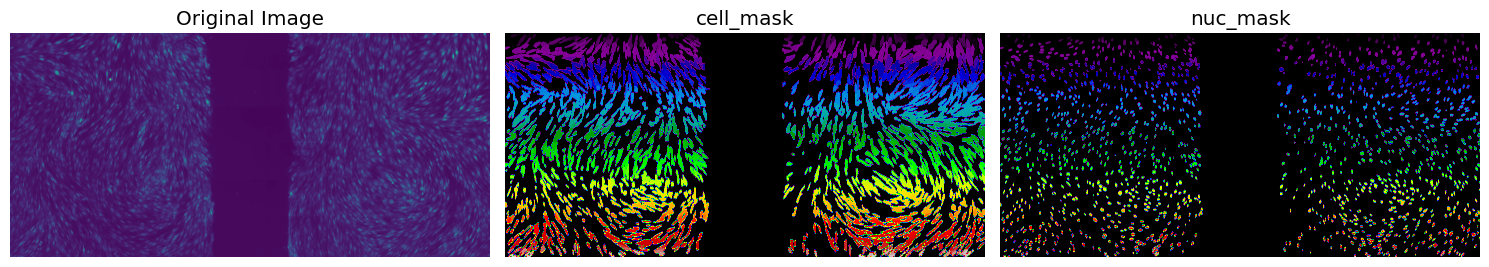

{'cellMasks': dask.array<from-npy-stack, shape=(1, 35, 1, 1, 5632, 12084), dtype=int8, chunksize=(1, 35, 1, 1, 5632, 12084), chunktype=numpy.ndarray>,
 'images': dask.array<from-npy-stack, shape=(1, 35, 1, 1, 5632, 12084), dtype=uint8, chunksize=(1, 35, 1, 1, 5632, 12084), chunktype=numpy.ndarray>,
 'nucMasks': dask.array<from-npy-stack, shape=(1, 35, 1, 1, 5632, 12084), dtype=int8, chunksize=(1, 35, 1, 1, 5632, 12084), chunktype=numpy.ndarray>,
 'position_indexs': array([1])}

In [7]:
settings.cellpose_min_size = 500
settings.cellpose_diameter = [180, 90]
settings.cellpose_pretrained_model = ["histone_cyto", 'histone_nuclei'] 

GeneralCellposeSegmentation().run()

In [8]:
CellProperties().run()

++++++++++++++++++++++++++++
Running :  CellProperties
++++++++++++++++++++++++++++

 ###################### 
FOV:0 TIMEPOINT: 0
 ###################### 


Traceback (most recent call last):
  File "c:\Users\formanj\GitHub\AngelFISH\src\GeneralStep.py", line 17, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\formanj\GitHub\AngelFISH\src\GeneralStep.py", line 283, in run
    output = self.main(**params)
             ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\formanj\GitHub\AngelFISH\src\SequentialSteps\CellProperty_Step.py", line 58, in main
    nuc_props = sk.measure.regionprops_table(nuc_mask.astype(int), image, properties=props_to_measure)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\formanj\GitHub\AngelFISH\.venv\Lib\site-packages\skimage\measure\_regionprops.py", line 1068, in regionprops_table
    regions = regionprops(
              ^^^^^^^^^^^^
  File "c:\Users\formanj\GitHub\AngelFISH\.venv\Lib\site-packages\skimage\measure\_regionprops.py", line 1389, in regionprops
    props = RegionProperties(
            ^^^^^^^^

ValueError: Label and intensity image shapes must match, except for channel (last) axis.

In [ ]:
Save_Masks().run()